# Confronto tra Insertion Sort e Counting Sort

## Scopo dell'esercizio.

Lo scopo di questo notebook Jupyter è quello di implementare gli algoritmi insertion sort e counting sort al fine di verificare la correttezza di ciò che abbiamo studiato nel corso di Algoritmi e Strutture Dati.

## Aspetti Teorici.

Quelli che andremo a confrontare saranno 2 algoritmi di ordinamento. Con algoritmo di ordinamento si indende quell'algoritmo che risolve il problema computazionale di ordinare un insieme di dati secondo un particolare criterio. In questo caso noi ordineremo numeri interi all'interno di array provenienti dal modulo numpy.

### Insertion Sort
L'Inserion Sort è uno degli algortimi di ordinamento più semplici, ma anche uno dei meno efficenti. Questo è un algoritmo per confronto, ovvero ordina gli elemnti mediante confronti tra coppie di valori. La strategia utilizzata è quella di creare per iterazioni successivi un sottoinsieme ordinato sempre più grande, partendo da un unsieme vuoto fino all'intero array. Questa strategia può essere riassunta con il suo invariante di ciclo: "*Prima della i-esima iterazione gli elementi dell'array A[1, i] sono quelli presenti originariamente in quell'intervallo, ma ordinati*". Quello che volgiamo verificare di questo algoritmo è che presenti i seguenti costi asintotici:

* **Caso migliore**: $\theta(n)$
* **Caso medio**: $O(n^2)$
* **Caso peggiore**: $O(n^2)$

### Counting Sort
Il Counting sort è un algoritmo di ordinamento che non sfruta una strategia di controntro tra elementi, e quindi non è affetto dalla limitazione di avere un costo nel caso peggiore di $\Omega(log(n)n)$. Questo algoritmo per ordinare gli elementi "conta" per ogni valore all'interno di un array quanti sono <=, e grazie a questa informazione riesce a capire dove inserire l'elemento. Questo algoritmo però è limitato a poter ordinare solamente array di elementi naturali (oppure interi con leggere variazioni). Con queste premesse si ottiene che il costo asintotico di questo algoritmo è:
* **Qualsiasi caso**: $\theta(k + n)$
In questo caso con k si intende il numero più grande presente nell'array (oppure la differenza tra il massimo e il minimo in alcune implementazioni).

## Descrizione del codice

Nei seguenti blocchi si alterneranno tra codice e blocchi di testo, dove i secondi servono a dare delucidazioni sui primi.

### Algoritmi di Ordinamento.

Di seguito ci sono le implementazioni degli algoritmi precedentemente descritti, corredati da dei commenti che spiegano brevemente i significati degli argomenti che necessitano. Si è scelto di utilizzare gli array del modulo *numpy* per evitare che l'implementazione degli *array/liste* del Python potesse influire sull'effettiva esecuzione del codice.

Di seguito è presentato il codice dell'**Insertion Sort**. Questa si tratta di una implementazione abbastanza standard di questo algoritmo.

In [32]:
import numpy as np

def insertion_sort(A):
    """
    A è l'array che deve ordinare, non che anche l'oggetto in cui verrà salvato il
    risultato. 
    """
    length = A.size
    for j in range(1, length):
        key = A[j]
        i = j - 1
        while(i >= 0 and A[i] > key):
            A[i + 1] = A[i]
            i-= 1
        A[i + 1] = key

Invece quello che si trova qua sotto è il codice del **Counting Sort**. Possimao notare come questo algoritmo non si serva di confronti a coppie dei valori all'interno dell'array, come abbiamo specificato nella parte torica. Come descritto nei commenti è anche necessario passare un array in cui inserire i valori ordinati e $k$ (ovvero il numero massimo all'interno dell'array). Sarebbe possibile individuare questo numero all'interno della funzione stessa, ma questa richiederebbe un costo aggiuntivo che non sarebbe strettamente proprio dell'algoritmo.

In [33]:
def counting_sort(A, B, k):
    """
    I parametri sono i seguenti:
     -A è l'array da ordinare
     -B è l'array in cui si inserirà il risultato
     -k numero massimo di presente nell'array A 
    """
    length = A.size
    C = np.zeros(k + 1, dtype = np.int32)
    for i in range(length):
        C[A[i]] += 1
    for i in range(k):
        C[i + 1] += C[i]
    for i in reversed(range(length)):
        B[C[A[i]] - 1] = A[i]
        C[A[i] ] -= 1

## Funzioni di Test

### Generazione di un Array Random
Questa funzione ci serve per generare un vettore di una determinata funzione che contenga valori casuali. Questa riceve anche un numero massimo che indica fino a che valore i numeri random possono essere generati. Successivamente è presente una istruzione che ci garantisce la presenza del massimo. Questo non sarebbe strettamente necessario, ma si è scelto di farlo proprio per evitare l'utilizzo del counting sort con grandezze sbagliate.

In [34]:
import numpy as np
import random

def random_array(length: int, max: int):
    """
    Questa funzione genera un array (provienente dal modulo numpy) con la lunghezza "length" fornita e 
    contenente come numero massimo "max".
    """
    if(length <= 0):
        raise ValueError("Errore! Impossibile usare un array di dimensione %d." % (length))
    array = np.array([random.randrange(max) for i in range(length)], dtype = np.int32)
    
    array[random.randrange(length)] = max

    return array


## Funzione di Testing
La seguente funzione invece serve per generare un test, fornendogli il tipo di algortimo da usare ed il tipo di test. Oltre a questi dati si devono inserire altri valori: fino a quale valore bisogna eseguire i test, i valori massimi dentro questi array, il numero di volte per cui bisogna fare ogni volta i test e l'intervallo di distanza (in numero di elementi nell'array) tra un test e l'altro.
I risultati che questa funzione genera sono 2 liste: la prima indica il numero di elementi su cui vengono fatti i test, la seconda il tempi (medi) corrispondenti.

In [35]:
import math
from enum import IntEnum
import matplotlib.pyplot as plt
from timeit import default_timer as timer

class algorithm_type(IntEnum):
    Insertion = 1
    Counting = 2

class test_type(IntEnum):
    Random = 1
    Order = 2
    Reverse = 3

def sorting_test(algo: algorithm_type, type: test_type, length: int, iter: int, interval: int, max: int):
    """
    Questa funzione permette di eseguire un particolare tipo di test su un particolare tipo di algoritmo di ordinamento.
    I parmatri utilizzati sono i seguenti:
    - algo: il tipo di algoritmo da testare.
    - type: il tipo di test da eseguire.
    - length: la lungezza massi che deve raggiunger l'array durante i test.
    - iter: il numero di volte che bisogna esguire le misurazioni su uno specifico test.
    - interval: la distanza in numero di elementi tra un test e l'altro.
    - max: il numero massimo presente all'interno dell'array.
    """
    
    if(length <= 0):
        raise ValueError("Errore! Impossibile usare un array di dimensione %d." % (length))
    times = []
    dimensions = list(range(length - interval * math.floor(length / interval), length + 1, interval))
    try:
        dimensions.remove(0)
    except ValueError:
        print(end = "")
    for i in dimensions:
        time = 0
        for j in range(iter):
            argument = []
            if(type == test_type.Random):
                argument = random_array(i, max)
            elif(type == test_type.Order):
                argument = np.array([math.floor(max * (k / i))  for k in range(1, i + 1)], dtype = np.int32)
            elif(type == test_type.Reverse):
                argument = np.array([math.floor(max * (k / i))  for k in range(i, 0, -1)], dtype = np.int32)
            if(algo == algorithm_type.Counting):
                B = np.zeros(i)
                start = timer()
                counting_sort(argument, B, max)
                end = timer()
            elif(algo == algorithm_type.Insertion):
                start = timer()
                insertion_sort(argument)
                end = timer()
            time += (end - start)
        times.append(time / iter)
    
    return dimensions, times

## Esecuzione dei test
I segunti blocchi di codice generano i risultati dei vari test ritenuti significativi per comprendere il tempo di esecuzione di questi algoritmi.

## Parametri Utilizzati
In questa sezione sono definite tutte le variabili che verranno utilizzate per generare i vettori di test.

* **Length_1**: si riferisce alla lunghezza massima dell'array per cui vengono fatti i test principali.
* **Length_order**: si riferisce alla lunghezza massima dell'array con cui viene fatto il test con array ordinati.
* **Length_2**: si riferisce alla lunghezza massima dell'array con cui si fa il test del counting sort al variare della dimensione.
* **Iter**: il numero di volte che vengono fatte le misurazioni.
* **Interval**: la distanza in numero di elementi tra una test e l'altro.
* **Max_1**: il numero massimo inserito all'interno degli array nel primo set di test.
* **Max_2**: il numero massimo inserito all'interno degli array nel secondo set di test.

In [36]:
"""
Dati che verranno utilizzati durante i test.
"""

length_1 = 5000
length_order = 10000
length_2 = 1000
iter = 50
interval = 200
max_1 = 100
max_2 = 10000

## Esecuzione dei Test
I blocchi che seguiranno contegono il codice per l generazione dei risultati dei test. Ogni blocco esegue un set di test che poi presenterà come grafico o tabella.

### Caso medio
Questo blocco esegue i test fornendo agli algoritmi degli array casuali. Questo ci serve per poter testare l'andamento degli algortimi nel caso medio. Da questo ci sapettiamo, come da teoria, che l'andamento dell'insertion sort sia quadratico, mentre quello del counting sia lineare rispetto ad $n$.

In [37]:
x_insertion, y_insertion = sorting_test(algorithm_type.Insertion, test_type.Random, length_1, iter, interval, max_1)
print("Test insertion (medio) terminato")
x_counting, y_counting = sorting_test(algorithm_type.Counting, test_type.Random, length_1, iter, interval, max_1)
print("Test couting (medio) terminato")

Test insertion (medio) terminato
Test couting (medio) terminato


/tmp/ipykernel_2432/717636471.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


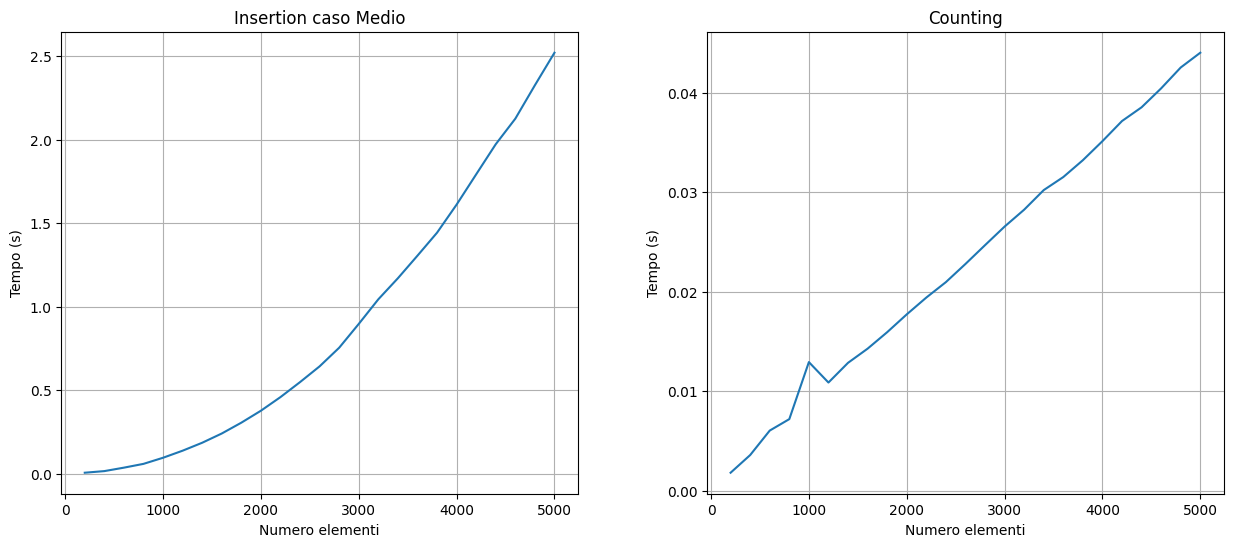

In [38]:
plt.figure(figsize = (15, 6))
plt.ylim(bottom = 0)
ax1 = plt.subplot(121)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Insertion caso Medio")
ax1.plot(x_insertion, y_insertion)
plt.grid(True)
ax2 = plt.subplot(122)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Counting")
ax2.plot(x_counting, y_counting)
plt.grid(True)
plt.subplots_adjust(wspace = 0.25)

plt.show()

### Tabella dei Dati

In [67]:
import pandas as pd

insertion_data = []
counting_data = []
rows = []

for i in range(len(x_insertion)):
    rows.append(x_insertion[i])
    insertion_data.append(round(y_insertion[i], 2))
    counting_data.append(round(y_counting[i], 4))
pd.DataFrame({"Insertion": insertion_data, "Counting" : counting_data}, index = rows).tail(10)

,Insertion,Counting
3200,1.04,0.0283
3400,1.17,0.0302
3600,1.30,0.0315
3800,1.44,0.0332
4000,1.61,0.0351
4200,1.79,0.0372
4400,1.97,0.0385
4600,2.12,0.0405
4800,2.32,0.0426
5000,2.52,0.0440


La tabella sopra riportata contiene i tempi di esecuzione degli ultimi 10 campionamenti. Innanzitutto possiamo notare una netta differenza in ordini di grandezza tra questi dati, ma ci aiutano ancora una volta a capire meglio gli andamenti asintotici. Infatti, al netto di leggere differenza, il tasso di crescita del counting sort da una riga alla successiva è di circa 2 $ms$. Invece, per l'insertion sort questo tasso di crescita non è costante, e tende a crescere sempre di più all'aumentare della dimensione. 

### Commento
Dai risultati mostrati dai grafci qui sopra riportati possiamo dire che rispettano all'incirca l'andamento teorico atteso, ovvero dire che il counting sort ha un andamento lineare mentre l'insertion sort quadratico rispetto a $n$.
L'andamento quadratico dell'insertion sort non è molto evidente, e per spiegare questo fenomeno bisogna prendere in cosiderazione la funzione di costo esatta. Nella forma esatta della funzione di costo assoluta (del caso peggiore) compare un termine $frac{-n}{2}$. \'E ragionevole aspettarsi che il termine lineare sia ancora più incisivo nel caso medio, e quindi possiamo dire che l'andamento teorico atteso è rispettato.

Notare come le scale dei 2 grafici siano diverse, e che quindi counting sort sia in assoluto più efficiente rispetto a insertion sort nel caso di un array casuale.

### Caso migliore

In questo blocco andremo invece a verificare l'andamento dei nostri algoritmi nel caso migliore per l'insertion sort. Questo si tratta del caso in cu l'array di partenza è già ordinato, che quindi porta il tempo asintotico ad essere lineare. Per quanto riguarda invece il counting sort, non avendo questo un caso migliore o peggiore, ci aspettiamo un tempo asintotico similare al caso precedente.

In [40]:

x_insertion_order, y_insertion_order = sorting_test(algorithm_type.Insertion, test_type.Order, length_order, iter, interval, max_1)
print("Test insertion (migliore) terminato")
x_counting_order, y_counting_order = sorting_test(algorithm_type.Counting, test_type.Order, length_order, iter, interval, max_1)
print("Test couting (migliore) terminato")

Test insertion (migliore) terminato
Test couting (migliore) terminato


/tmp/ipykernel_2432/1911817683.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


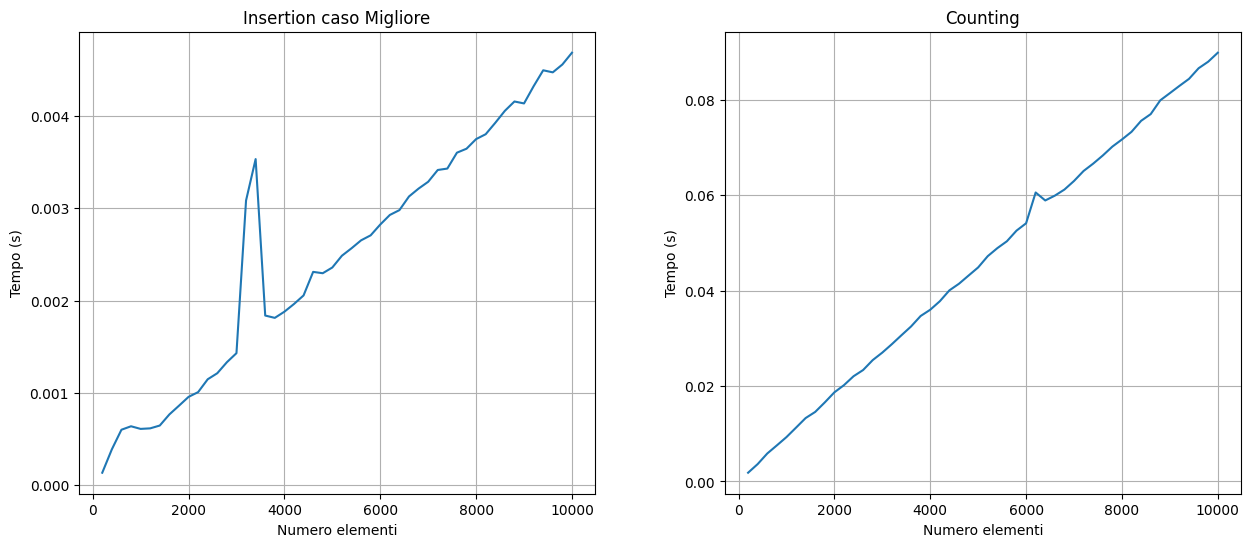

In [41]:
plt.figure(figsize = (15, 6))
plt.ylim(bottom = 0)
ax1 = plt.subplot(121)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Insertion caso Migliore")
plt.grid(True)
ax1.plot(x_insertion_order, y_insertion_order)
ax2 = plt.subplot(122)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Counting")
plt.grid(True)
ax2.plot(x_counting_order, y_counting_order)
plt.subplots_adjust(wspace = 0.25)

plt.show()

In [66]:

insertion_order_data = []
counting_order_data = []
rows_order = []

for i in range(len(x_insertion_order)):
    rows_order.append(x_insertion_order[i])
    insertion_order_data.append(round(y_insertion_order[i], 5))
    counting_order_data.append(round(y_counting_order[i], 4))
pd.DataFrame({"Insertion": insertion_order_data, "Counting" : counting_order_data}, index = rows_order).tail(10)


,Insertion,Counting
8200,0.00380,0.0733
8400,0.00393,0.0756
8600,0.00406,0.0770
8800,0.00416,0.0799
9000,0.00414,0.0814
9200,0.00433,0.0829
9400,0.00450,0.0844
9600,0.00448,0.0866
9800,0.00456,0.0880
10000,0.00469,0.0899


Da tabella in questo caso mostra come entrambi gli andamenti siano sostanzialemnte lineare, ma con coefficienti differenti. Inoltre diventa evidente la notevole differenza anche in termini di ordine di grandezza tra i tempi di esecuzione dei 2 algoritmi.

### Commento
Invece qui notiamo come entrambi gli algoritmi hanno un andamento lineare rispetto ad $n$ nel caso di un array ordinato. Per quanto riguarda il counting sort questo era piuttosto scontato, in quanto non dipende da confronti tra i numeri. Mentre per l'insertion sort era atteso un miglioramento delle prestazioni.
Un fenomeno particolare che si può apprezzare in questo caso è il fatto che l'insertion sort sia in termini assoluti più efficiente del counting sort, che trova spiegazione nei seguenti motivi:
* L'insertion sort ordina sul posto senza allocare memoria, operazione che per quanto ignorata nel nostro modello di costo in realtà risulta molto pesante.
* L'insertion sort nel caso di array ordinato esegue soltanto $n - 1$ confronti, mentre il counting sort deve iterare su 2 array di lunghezza $n$ ed uno di lunghezza $k$.

Il grafico dell'insertion sort spesso è caratterizzato da picchi improvvisi dei tempi di esecuzione. Questo effetto è derivante dai valori assoluti che sono rappresentati sui grafici. Infatti possimo notare come l'insertion sort per ordinare un array (o meglio rendersi conto che è già ordinato) da 6000 elementi impiega pochi $ms$. \'E evidente che se ci fosse una differenza di poche centinaia di $\mu s$, dipendente da una allocazione della CPU differente, comporterebbe forti oscillazioni dei grafici.

### Caso peggiore

In questo test andremo a verificare l'andamento di questi algortimi di ordinamento nel caso di un array ordinato al contrario, ovvero dai numeri più gradi a quelli più piccoli. Questo si tratta del caso peggiore per l'insertion sort in quanto ad ogni iterazione esterna si dovrà scrorrere gli elementi fino alla testa dell'array. Come detto precedentemente questo non dovrebbe avere effetti significativi sull'andamento dell'counting sort.

In [42]:

x_insertion_reverse, y_insertion_reverse = sorting_test(algorithm_type.Insertion, test_type.Reverse, length_1, iter, interval, max_1)
print("Test insertion peggiore terminato")
x_counting_reverse, y_counting_reverse = sorting_test(algorithm_type.Counting, test_type.Reverse, length_1, iter, interval, max_1)
print("Test couting peggiore terminato")

Test insertion peggiore terminato
Test couting peggiore terminato


/tmp/ipykernel_2432/4035734303.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


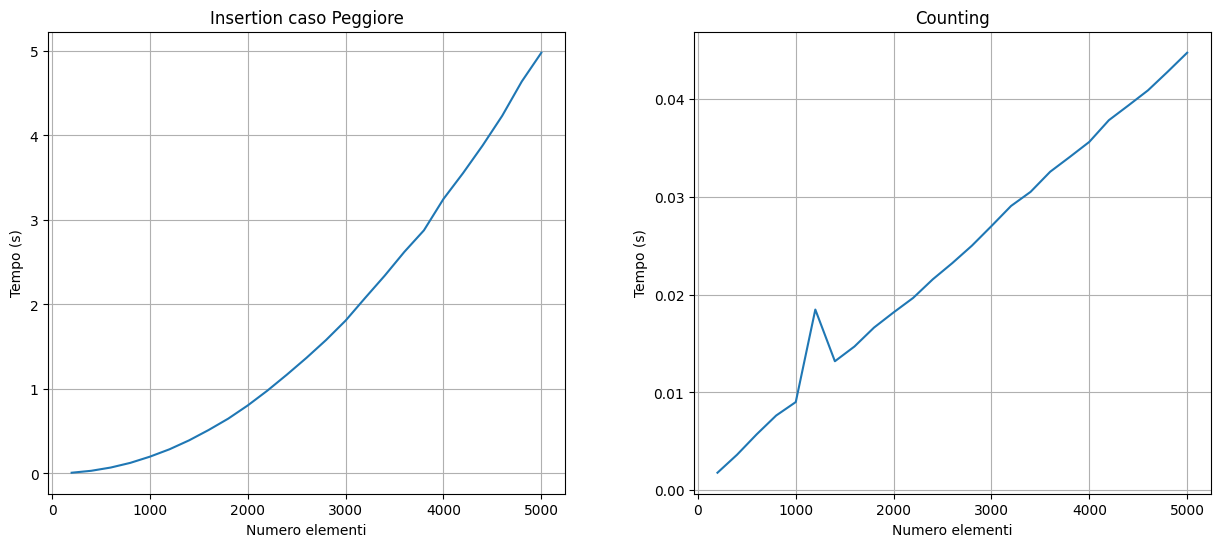

In [43]:
plt.figure(figsize = (15, 6))
plt.ylim(bottom = 0)
ax1 = plt.subplot(121)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Insertion caso Peggiore")
plt.grid(True)
ax1.plot(x_insertion_reverse, y_insertion_reverse)
ax2 = plt.subplot(122)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Counting")
plt.grid(True)
ax2.plot(x_counting_reverse, y_counting_reverse)
plt.subplots_adjust(wspace = 0.25)

plt.show()

### Commento

Come riportato dai grafici possiamo notare che la curva del counting sort rimane di andamento lineare, mentre l'insertion sort aumenti il tempo assoluto per l'esecuzione. Questo è un risultato che ci indicava la teoria, ma che diversamente da come era prevedibile non accentua la curva di ordine 2.
Per apprezzare meglio la differenza tra caso medio e peggiore i 2 andamenti sono stati riportati nel grafico che segue.

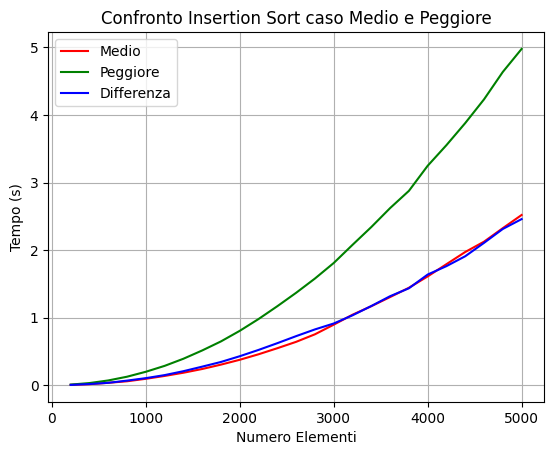

In [44]:
x_difference = []
y_difference = []
for i in range(len(x_insertion)):
    x_difference.append(x_insertion[i])
    y_difference.append(y_insertion_reverse[i] - y_insertion[i])

plt.title("Confronto Insertion Sort caso Medio e Peggiore")
plt.xlabel("Numero Elementi")
plt.ylabel("Tempo (s)")
plt.grid(True)
plt.plot(x_insertion, y_insertion, color = "red", label = "Medio")
plt.plot(x_insertion_reverse, y_insertion_reverse, color = "green", label = "Peggiore")
plt.plot(x_difference, y_difference, color = "blue", label = "Differenza")
plt.legend(loc = "upper left")
plt.show()

L'andamento delle 2 funzioni rimane lo stesso, ovvero una divergenza quadratica, ma come era ovvio che i tempi assoluti di esecuzione aumentino con lo stesso andamento.
La differenza tra questi 2 andamenti sembra avere una divergenza quadratica, quindi è probabile che nella funzione di costo assoluta i coefficienti del termine di 2° grado siano diversi per i 2 casi.

### Confronto con numeri diversi.

In questo test andremo a verificare l'andamento di del counting sort con un numero massimo dentro l'array diverso. Questo test ci serve per verificare una variazione del tempo di esecuzione, in quanto la teoria ci indica che questa dipende anche dal fattore $k$.

In [45]:
x_counting_greater, y_counting_greater = sorting_test(algorithm_type.Counting, test_type.Random, length_1, iter, interval, max_2)
print("Test couting (medio) terminato")

Test couting (medio) terminato


/tmp/ipykernel_2432/1278760981.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


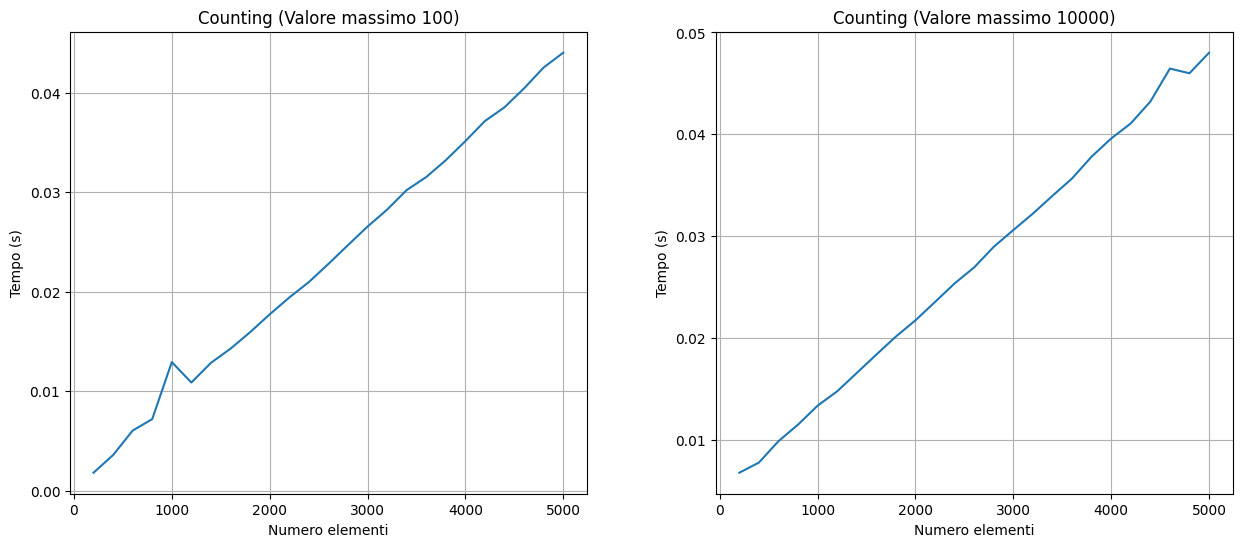

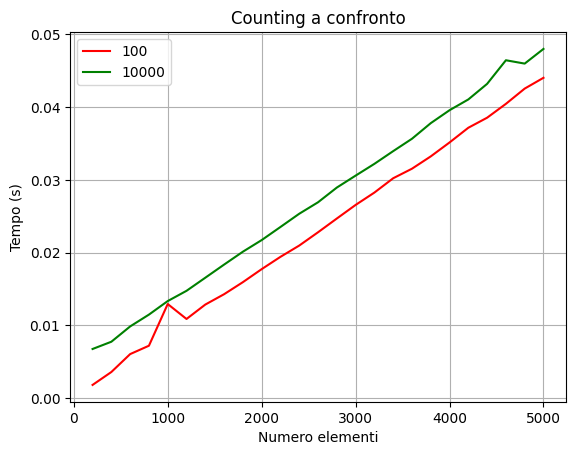

In [46]:
plt.figure(figsize = (15, 6))
plt.ylim(bottom = 0)
ax1 = plt.subplot(121)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Counting (Valore massimo %d)" % (max_1))
ax1.plot(x_counting, y_counting)
plt.grid(True)
ax2 = plt.subplot(122)
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Counting (Valore massimo %d)" % (max_2))
ax2.plot(x_counting_greater, y_counting_greater)
plt.grid(True)
plt.subplots_adjust(wspace = 0.25)

plt.figure()
plt.ylabel("Tempo (s)")
plt.xlabel("Numero elementi")
plt.title("Counting a confronto")
plt.plot(x_counting, y_counting, color = "red", label = "%d" % (max_1))
plt.plot(x_counting_greater, y_counting_greater, color = "green", label = "%d" % (max_2))
plt.legend(loc = "upper left")
plt.grid(True)

plt.show()

### Commento

Come mostato dai primi 2 grafici l'andamento al variare della dimensione dell'array, ma con numeri massimi diversi, resta lineare. Però si può notare come il secondo andamento sia leggermente traslato verso l'alto, come messo in risalto dal 3° grafico sopra riportato. Questo ci dice che l'andamento dell'counting sort dipenda sia da $n$ che da $k$, ma in modo indipendente (lineare). Infatti se fosse dipeso in qualche modo da $k \cdot n $ avremmo notato un cambio di pendenza della retta.

### Al crescere del numero massimo

In questo test andremo a vedere se l'andamento del counting sort rispetto al numero massimo all'interno dell'array è effettivamente lineare. Per fare questo faremo un test in cui sarà il numero massimo ad aumentare mentre la dimensione dell'array rimane costante.

Per fare questo ci serviremo di un'altra funzione per i test che si occuperà di generare array dal numero massimo via crescenti.

In [47]:
def sorting_test_max(algo: algorithm_type, type: test_type, length: int, iter: int, interval: int, max: int):
    """
    Questa funzione permette di eseguire un test in cui la dimensione dell'array rimane fissa, 
    mentre è il numero massimo all'interno dell'array a crescere ad ogni iterazione:
    - algo: il tipo di algoritmo da testare.
    - type: il tipo di test da eseguire.
    - length: la lungezza massi che deve raggiunger l'array durante i test.
    - iter: il numero di volte che bisogna esguire le misurazioni su uno specifico test.
    - interval: la distanza in numero di elementi tra un test e l'altro.
    - max: il numero massimo presente all'interno dell'array.
    """
    
    if(length <= 0):
        raise ValueError("Errore! Impossibile usare un array di dimensione %d." % (length))
    times = []
    maxis = list(range(max - interval * math.floor(max / interval), max + 1, interval))
    try:
        maxis.remove(0)
    except ValueError:
        print(end = "")
    for i in maxis:
        time = 0
        for j in range(iter):
            argument = []
            if(type == test_type.Random):
                argument = random_array(length, i)
            elif(type == test_type.Order):
                argument = np.array([math.floor(i * (k / length))  for k in range(1, length + 1)], dtype = np.int32)
            elif(type == test_type.Reverse):
                argument = np.array([math.floor(i * (k / length))  for k in range(length, 0, -1)], dtype = np.int32)
            if(algo == algorithm_type.Counting):
                B = np.zeros(length)
                start = timer()
                counting_sort(argument, B, i)
                end = timer()
            elif(algo == algorithm_type.Insertion):
                start = timer()
                insertion_sort(argument)
                end = timer()
            time += (end - start)
        times.append(time / iter)
    
    return maxis, times

In [48]:
x_counting_max, y_counting_max = sorting_test_max(algorithm_type.Counting, test_type.Random, length_2, iter, interval, max_2)

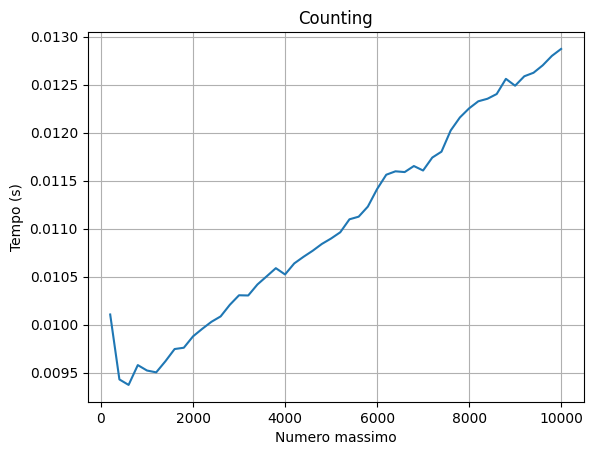

In [49]:
plt.plot(x_counting_max, y_counting_max)
plt.grid(True)
plt.title("Counting")
plt.ylabel("Tempo (s)")
plt.xlabel("Numero massimo")

plt.show()

### Commento

L'andamento rappresentato dal grafico sopra rappresentato ha sicuramente un andamento di tipo lineare. L'improvvisa impennata dei tempi per numero massimo molto piccolo può dipendere dalla gestione delle risorse da parte del sistema operativo; è infatti ipotizzabile che per i primi test il computer non metta in atto le strategie di ottimizzazione del codice, mentre lo riseca a fare per dimensioni maggiori.  

## Conclusioni

Alla luce dei risultati ottenuti precedentemente possiamo dire che l'andamento atteso dalla teoria è stato rispettato. Sicuramente abbaimo ottenuto un andamento lineare per il counting sort al avriare di $n$ e $k$, ed un andamento più che lineare per l'insertion sort. In breve, sotto sono riportati i risultati teorici che sono stati provati:
* L'andamento teorico del counting sort è lineare rispetto a $n$ e $k$, sotto qualsiasi condizione.
* L'andamento dell'insertion sort nel caso migliore è lineare, e più che lineare negli altri.
* L'andamento dell'insertion sort è peggiore nel caso di array ordinati al contrario rispetto ad array casuali.
* Il caso migliore per l'insertion sort è l'array ordinato.
* L'andamento di counting sort dipende da una combianzione lineare di $n$ e $k$.

Nonostante ciò c'è un elemento che non è stato verificato pienamente. Per quanto l'andamento effettivo di insertion sort sia più che lineare, questo non è contro ogni dubbio quadratico.

Infine sono stati anche individuati degli elementi che la teoria prima non ci forniva. La differenza tra l'insertion sort nel caso peggiore e quello medio sembra avere lo stesso andamento del caso medio, e quindi possiamo concludere che nella loro funzione di costo assoluto abbiano come coefficiente per il termine di ordine massimo 2 numeri diversi.

Si noti come questi test, per loro natura, sono stati condotti su un numero limitato di elementi, mentre l'andamento asintotico suppone proprio una dimensione che tente all'infinito, cosa impossibile da realizzare con esperimenti pratici.